<a href="https://colab.research.google.com/github/cameronliddle/Algorithms/blob/main/AirQualityAppliedPredictiveAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Table of Contents
1. Introduction
2. About the Data
3. Imports and Setup
4. Data Preparation
5. Visualisation
6. Modeling and Analysis





##### 1. Introduction
PM2.5 is a harmful air pollutant that poses serious risks to public health, causing respiratory and cardiovascular diseases. It also impacts the environment by reducing visibility, harming ecosystems, and contributing to climate change, with urban areas being the most affected.

##### 2. About the data
##### The dataset was obtained from Beijing Air Quality Data, which includes air quality and meteorological measurements collected from 2010 to 2014. The dataset includes 43,824 rows and 8 columns, representing hourly measurements across a 5-year period.
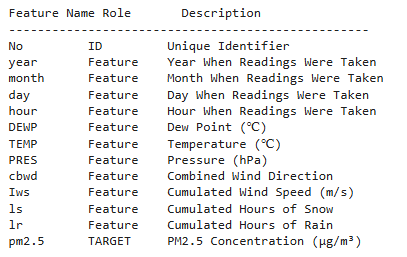

##3. Data Import

In [1]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Bejing/data.csv'

Mounted at /content/drive


In [5]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Bejing/data.csv')
df.head()


No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


#### Data Preparation

In [9]:
total_rows_before = len(df)
null_values_count = df['pm2.5'].isnull().sum()
df.dropna(subset=['pm2.5'], inplace=True)

total_rows_after = len(df)

print(f"Total rows before: {total_rows_before}")
print(f"Null values removed: {null_values_count}")
print(f"Total rows after: {total_rows_after}")


Total rows before: 43824
Null values removed: 2067
Total rows after: 41757


In [11]:
print(df.dtypes)

No         int64
year       int64
month      int64
day        int64
hour       int64
pm2.5    float64
DEWP       int64
TEMP     float64
PRES     float64
cbwd      object
Iws      float64
Is         int64
Ir         int64
dtype: object


In [16]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('datetime', inplace=True)


### Visualisations

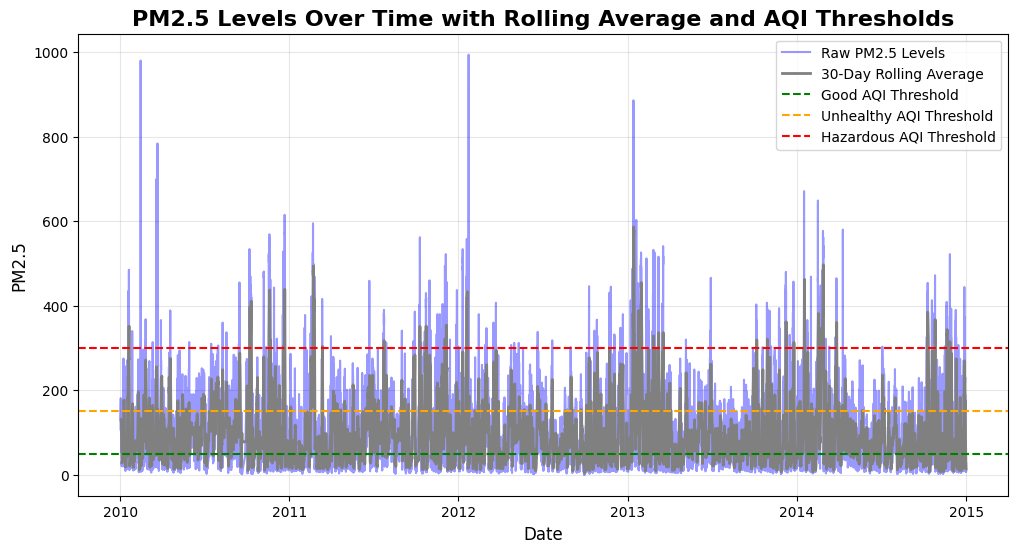

In [52]:
df['rolling_pm2.5'] = df['pm2.5'].rolling(window=30).mean()
plt.figure(figsize=(12, 6))
plt.plot(df['pm2.5'], alpha=0.4, label='Raw PM2.5 Levels', color='blue')
plt.plot(df['rolling_pm2.5'], color='grey', label='30-Day Rolling Average', linewidth=2)
plt.axhline(50, color='green', linestyle='--', label='Good AQI Threshold')
plt.axhline(150, color='orange', linestyle='--', label='Unhealthy AQI Threshold')
plt.axhline(300, color='red', linestyle='--', label='Hazardous AQI Threshold')
plt.title('PM2.5 Levels Over Time with Rolling Average and AQI Thresholds', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('PM2.5', fontsize=12)

plt.legend()
plt.grid(alpha=0.3)
plt.show()
# Highlights seasonal or long-term trends in PM2.5.

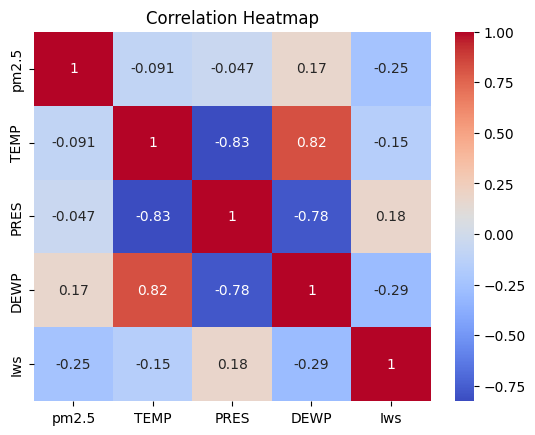

In [21]:
# Calculate correlations
corr = df[['pm2.5', 'TEMP', 'PRES', 'DEWP', 'Iws']].corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
#Quantifies relationships between PM2.5 and other variables.

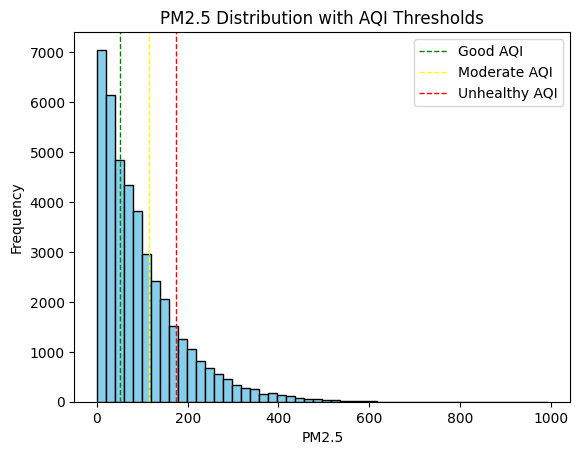

In [43]:
plt.hist(df['pm2.5'], bins=50, color='skyblue', edgecolor='black')
plt.axvline(50, color='green', linestyle='dashed', linewidth=1, label='Good AQI')
plt.axvline(115, color='yellow', linestyle='dashed', linewidth=1, label='Moderate AQI')
plt.axvline(175, color='red', linestyle='dashed', linewidth=1, label='Unhealthy AQI')
plt.title('PM2.5 Distribution with AQI Thresholds')
plt.xlabel('PM2.5')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#Histogram showing the frequency of PM2.5 levels with vertical lines indicating AQI thresholds (Good, Moderate, Unhealthy).

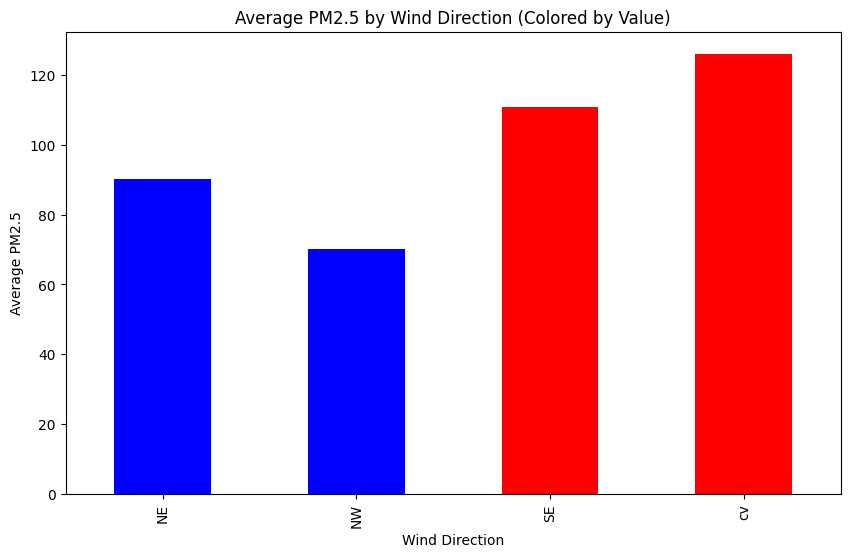

In [37]:
# Color by PM2.5 value
average_pm25 = df.groupby('cbwd')['pm2.5'].mean()
colors = average_pm25.apply(lambda x: 'red' if x > 100 else 'blue')

average_pm25.plot(
    kind='bar',
    title='Average PM2.5 by Wind Direction (Colored by Value)',
    figsize=(10, 6),
    color=colors
)
plt.xlabel('Wind Direction')
plt.ylabel('Average PM2.5')
plt.show()
#Explores how wind direction influences air quality

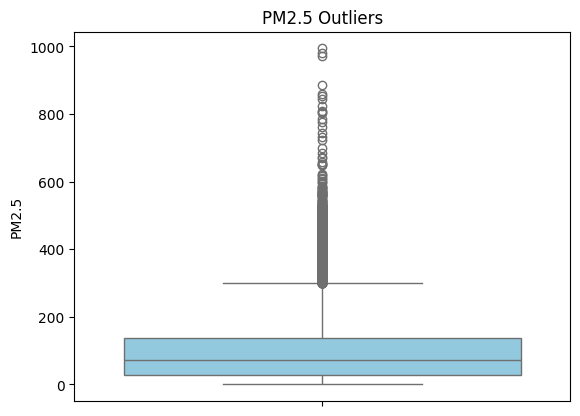

In [56]:
sns.boxplot(y='pm2.5', data=df, color='skyblue')
plt.title('PM2.5 Outliers')
plt.ylabel('PM2.5')
plt.show()
#Identifies extreme pollution events or anomalies.

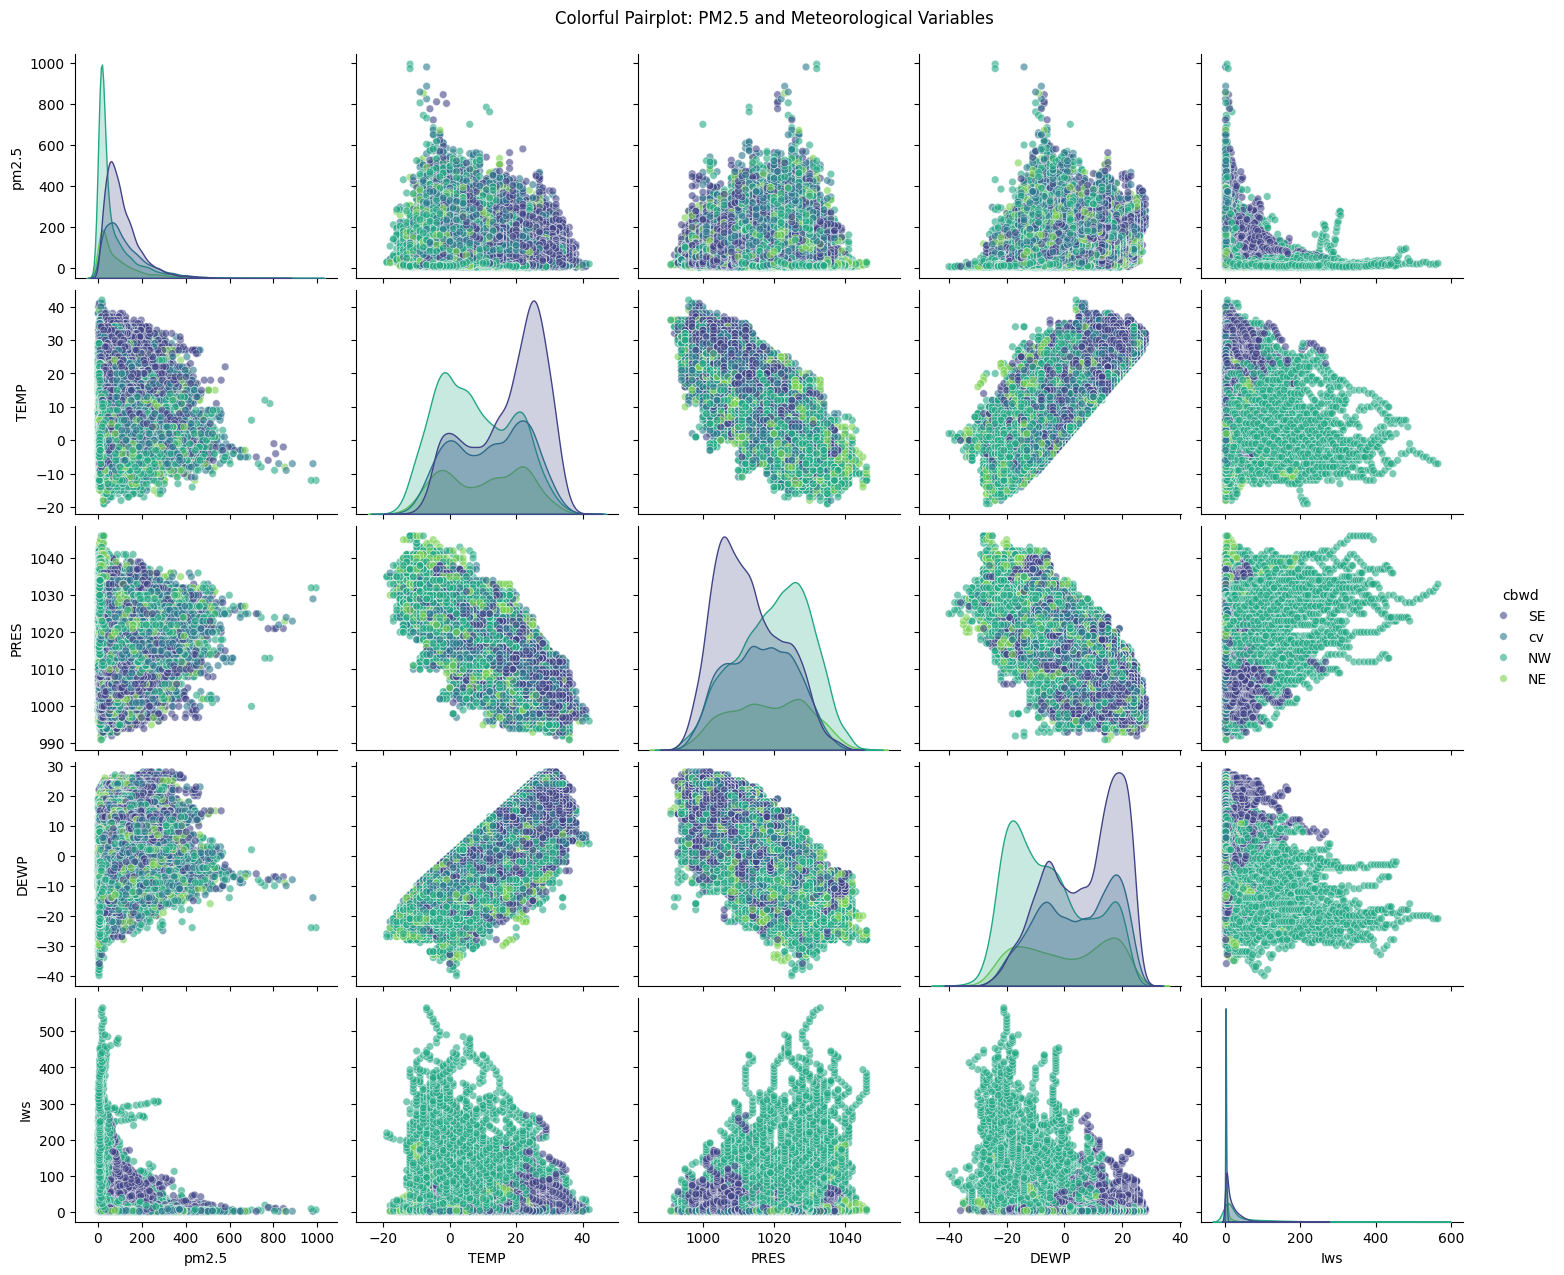

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

pairplot = sns.pairplot(
    df[['pm2.5', 'TEMP', 'PRES', 'DEWP', 'Iws', 'cbwd']],
    diag_kind='kde',
    hue='cbwd',
    palette='viridis',
    height=2.5,
    aspect=1.2,
    plot_kws={'alpha': 0.6, 's': 30}
)

# Add a title to the plot
pairplot.fig.suptitle("Colorful Pairplot: PM2.5 and Meteorological Variables", y=1.02)
plt.show()
# wind direction as hue to explore how PM2.5 relates to pollutant transport and dispersion.


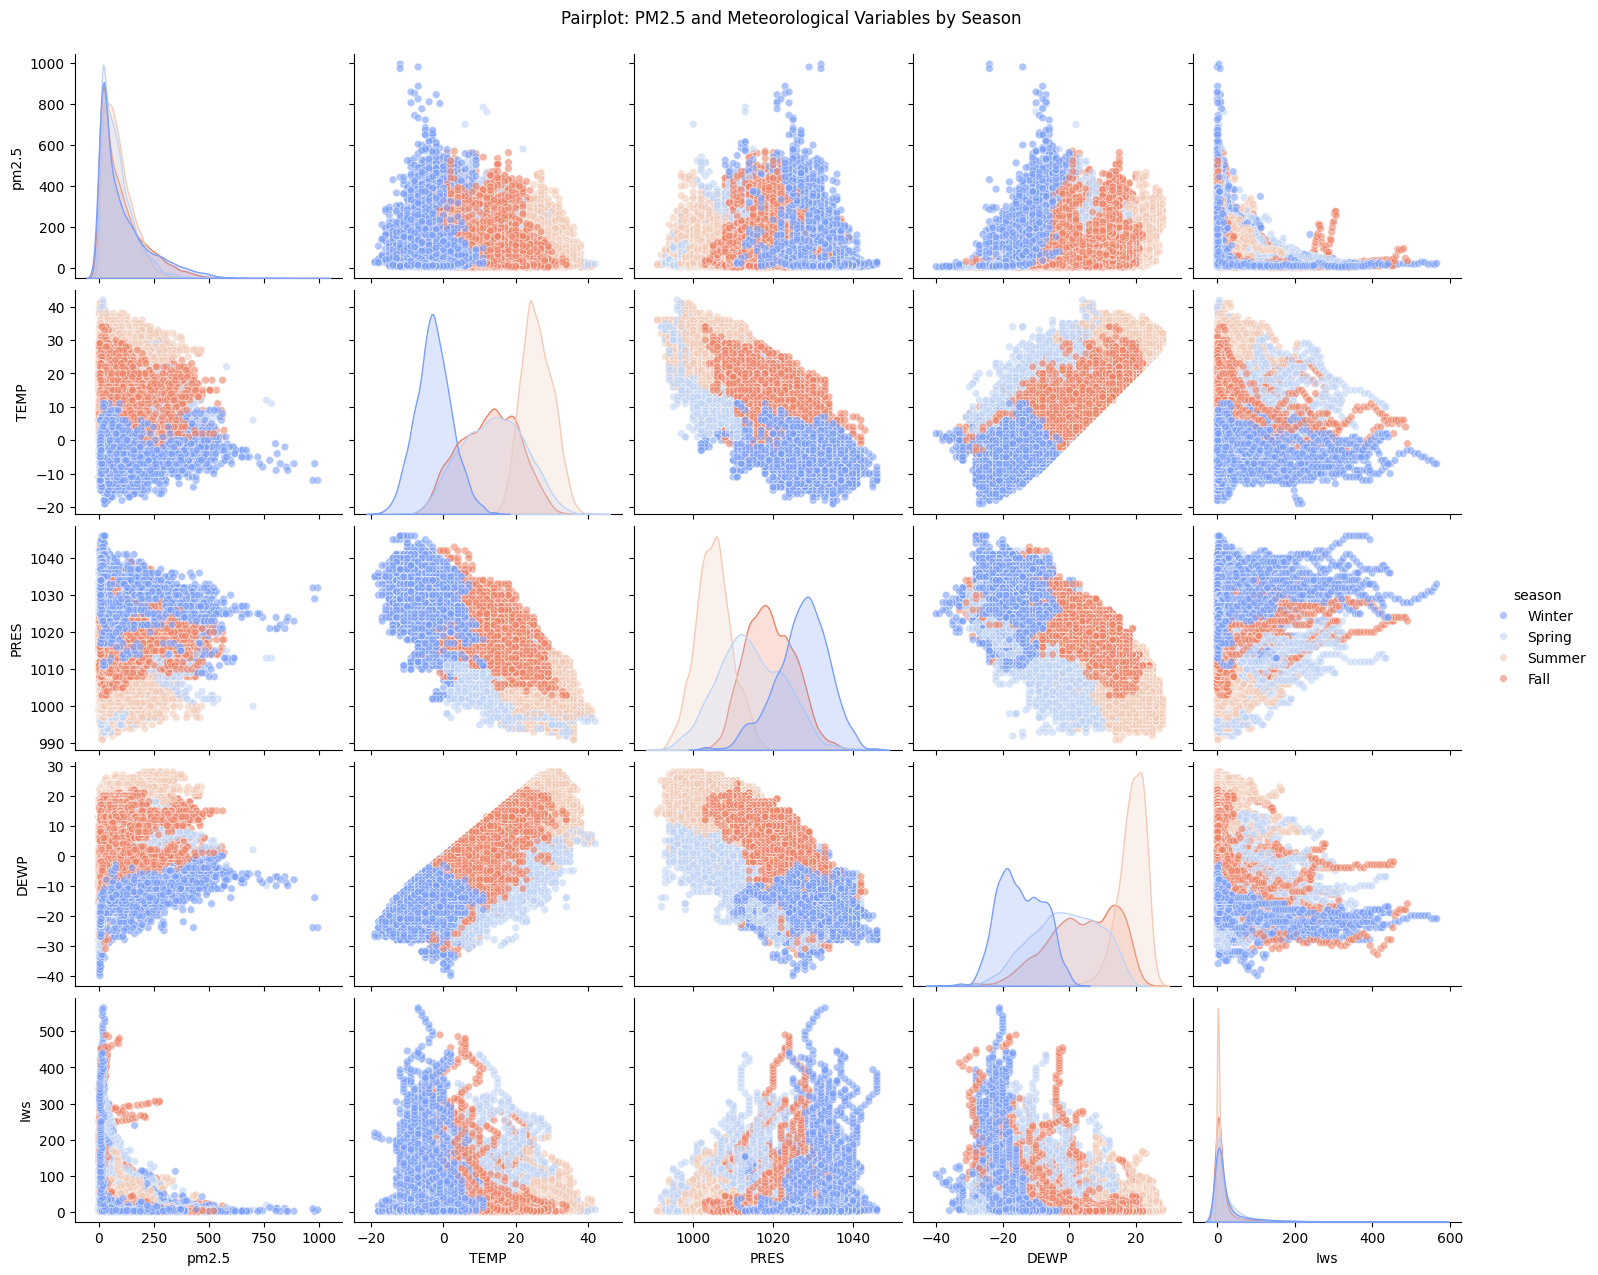

In [59]:
# Add seasons based on the month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['month'].apply(get_season)

# Create pairplot with season as hue
pairplot = sns.pairplot(
    df[['pm2.5', 'TEMP', 'PRES', 'DEWP', 'Iws', 'season']],
    diag_kind='kde',
    hue='season',
    palette='coolwarm',  # Season-related color palette
    height=2.5,
    aspect=1.2,
    plot_kws={'alpha': 0.6, 's': 30}
)

pairplot.fig.suptitle("Pairplot: PM2.5 and Meteorological Variables by Season", y=1.02)
plt.show()
# seasons as hue, as seasonal patterns often explain many other trends.

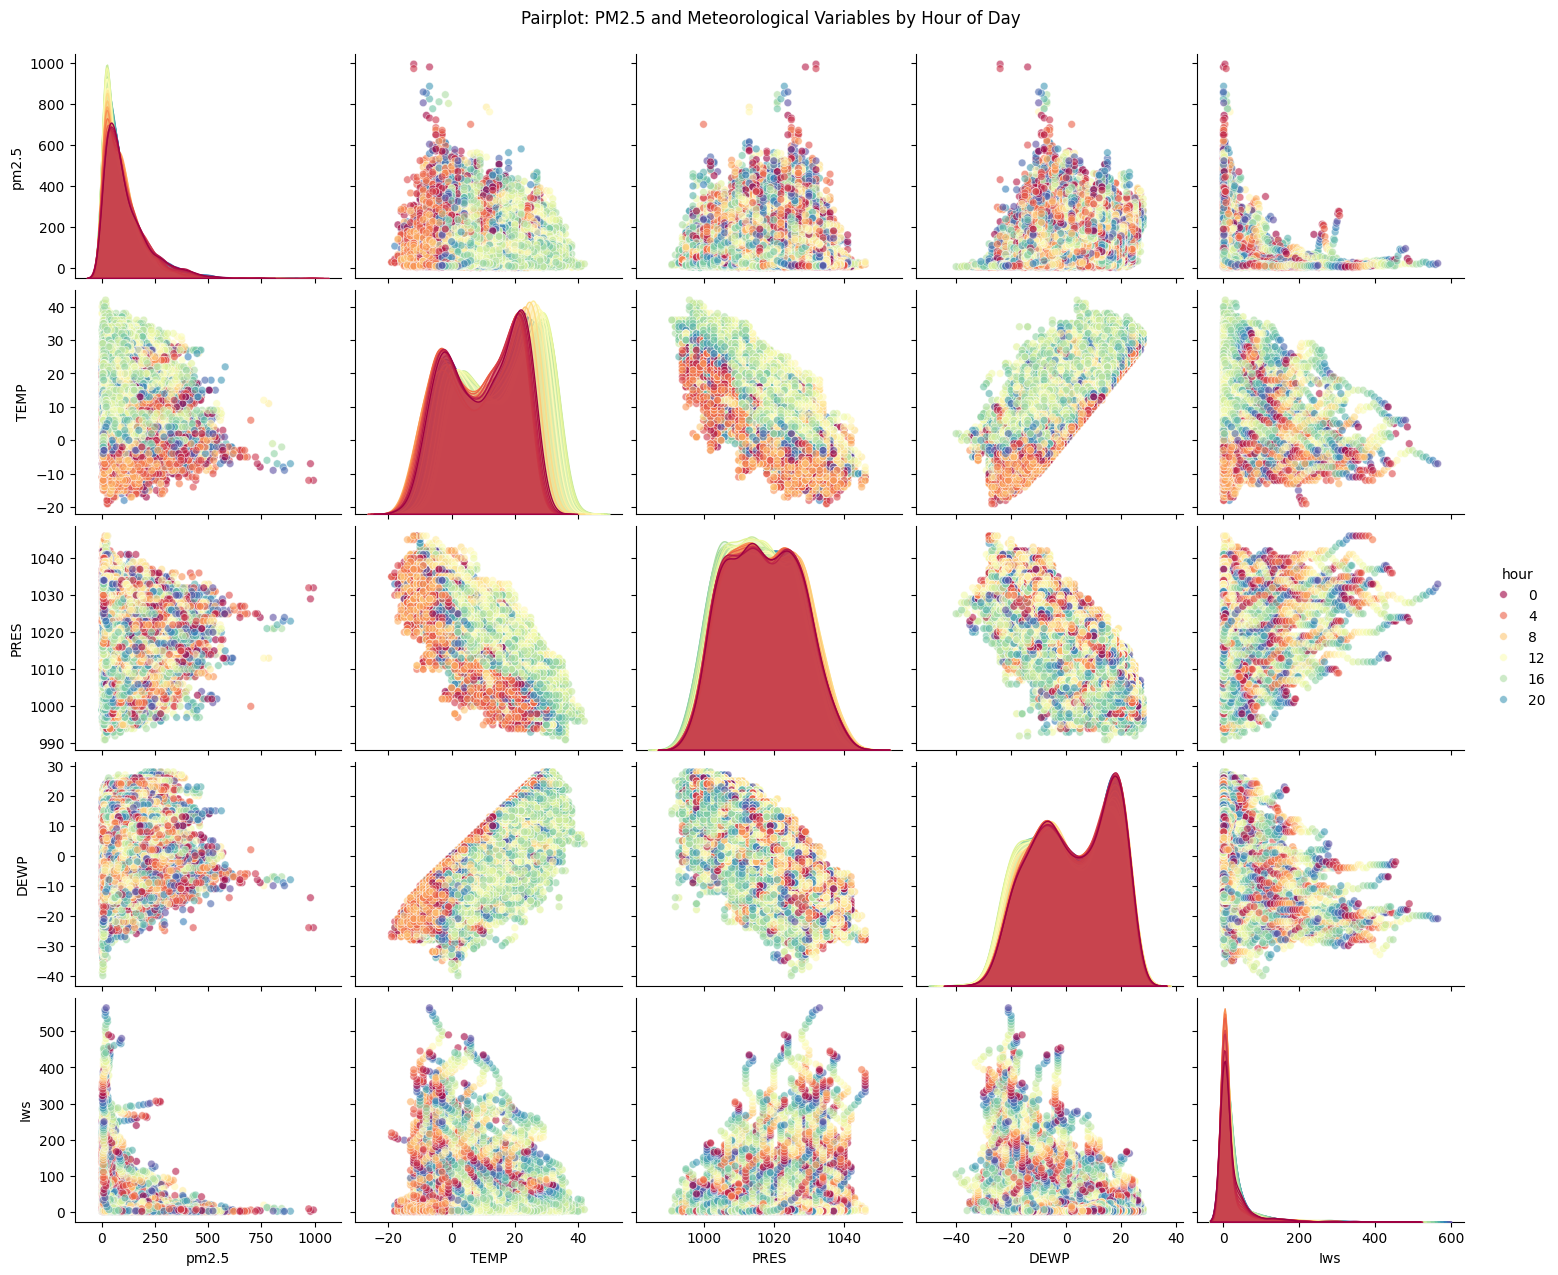

In [60]:
# Create pairplot with hour as hue
pairplot = sns.pairplot(
    df[['pm2.5', 'TEMP', 'PRES', 'DEWP', 'Iws', 'hour']],
    diag_kind='kde',
    hue='hour',
    palette='Spectral',  # Gradient palette for time of day
    height=2.5,
    aspect=1.2,
    plot_kws={'alpha': 0.6, 's': 30}
)

pairplot.fig.suptitle("Pairplot: PM2.5 and Meteorological Variables by Hour of Day", y=1.02)
plt.show()
# hour of day as hue to investigate diurnal variations.

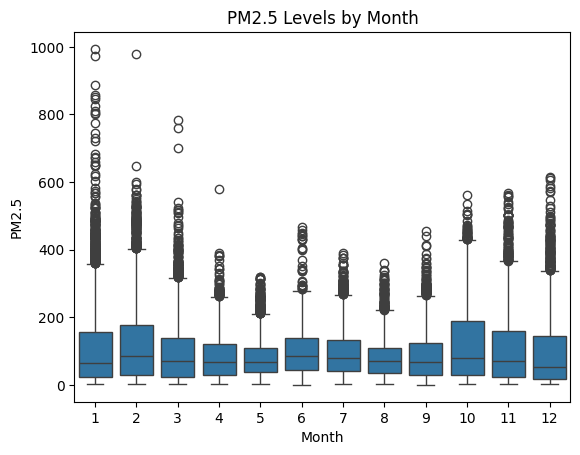

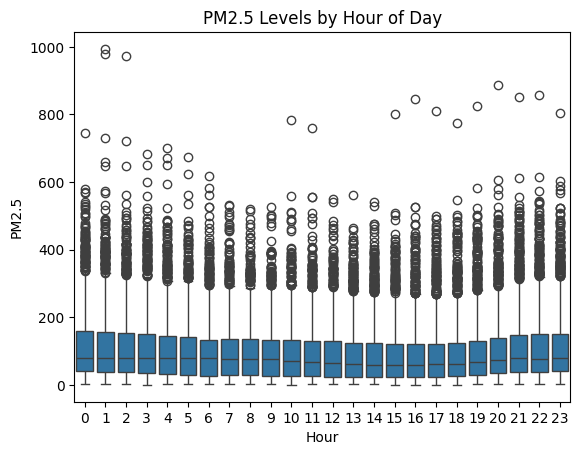

In [67]:
# Boxplot: PM2.5 by Month
sns.boxplot(x='month', y='pm2.5', data=df)
plt.title('PM2.5 Levels by Month')
plt.xlabel('Month')
plt.ylabel('PM2.5')
plt.show()

# Boxplot: PM2.5 by Hour
sns.boxplot(x='hour', y='pm2.5', data=df)
plt.title('PM2.5 Levels by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('PM2.5')
plt.show()
#Highlights seasonal patterns in PM2.5.

In [32]:
import plotly.express as px

# Interactive scatter plot
fig = px.scatter(df, x='TEMP', y='pm2.5', color='TEMP', title='PM2.5 vs Temperature',
                 labels={'TEMP': 'Temperature (°C)', 'pm2.5': 'PM2.5 (µg/m³)'})
fig.show()

# Interactive heatmap
fig = px.imshow(corr, text_auto=True, color_continuous_scale='RdBu_r', title='Correlation Heatmap')
fig.show()
#Highlights the relationship between PM2.5 and temperature.